In [78]:
# Load modules
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4 as nc
import nc_time_axis
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates

# Show plots in the notebook
%matplotlib inline

In [3]:
#1. Global methane levels from 2002
#Methane (CH4) is a naturally occurring Greenhouse Gas (GHG), 
#but one whose abundance has been increased substantially above its pre-industrial value by human activities, 
#primarily because of agricultural emissions (e.g., rice production, ruminants) and fossil fuel production and use. 
#A clear annual cycle is largely due to seasonal wetland emissions.

#Atmospheric methane abundance is indirectly observed by various satellite instruments. 
#These instruments measure spectrally resolved near-infrared and infrared radiation reflected or emitted by the Earth and its atmosphere. 
#In the measured signal, molecular absorption signatures from methane and constituent gasses can be identified. 
#It is through analysis of those absorption lines in these radiance observations that the averaged methane abundance in the sampled atmospheric column can be determined.

#For this problem set, methane levels have been determined by applying several algorithms to different satellite instruments. 
#Download the netCDF4 file (200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc) here, 
#which contains monthly-averaged methane levels (xch4) in the unit of ppb at each 5° (lon) x 5° (lat) grid over the globe from 2003-01 to 2020-06.


In [7]:
# Open the netCDF4 file
CH4 = xr.open_dataset("200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc", engine="netcdf4")

# Check the data
CH4

<xarray.Dataset>
Dimensions:                  (time: 210, bnds: 2, lat: 36, lon: 72, pressure: 10)
Coordinates:
  * time                     (time) datetime64[ns] 2003-01-16T12:00:00 ... 20...
  * lat                      (lat) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * lon                      (lon) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
Dimensions without coordinates: bnds, pressure
Data variables:
    time_bnds                (time, bnds) datetime64[ns] ...
    lat_bnds                 (lat, bnds) float64 ...
    lon_bnds                 (lon, bnds) float64 ...
    pre                      (pressure) float64 ...
    pre_bnds                 (pressure, bnds) float64 ...
    land_fraction            (lat, lon) float64 ...
    xch4                     (time, lat, lon) float32 ...
    xch4_nobs                (time, lat, lon) float64 ...
    xch4_stderr              (time, lat, lon) float32 ...
    xch4_stddev              (time, lat, lon) float32 ...
    column_averaging_kernel  (time, pressure, lat, lon) float32 ...
    vmr_profile_ch4_apriori  (time, pressure, lat, lon) float32 ...
Attributes: (12/28)
    activity_id:            obs4MIPs
    comment:                Since long time, climate modellers use ensemble a...
    contact:                Maximilian Reuter (maximilian.reuter@iup.physik.u...
    Conventions:            CF-1.7 ODS-2.1
    creation_date:          2021-02-05T09:48:47Z
    data_specs_version:     2.1.0
    ...                     ...
    source_version_number:  v4.3
    title:                  C3S XCH4 v4.3
    tracking_id:            892d184a-7b35-4bba-836a-94b9cfeb360e
    variable_id:            xch4
    variant_info:           Best Estimate
    variant_label:          BE

In [9]:
#1.1 [5 points] Compute methane climatology for each month, and plot your results in 12 panels.

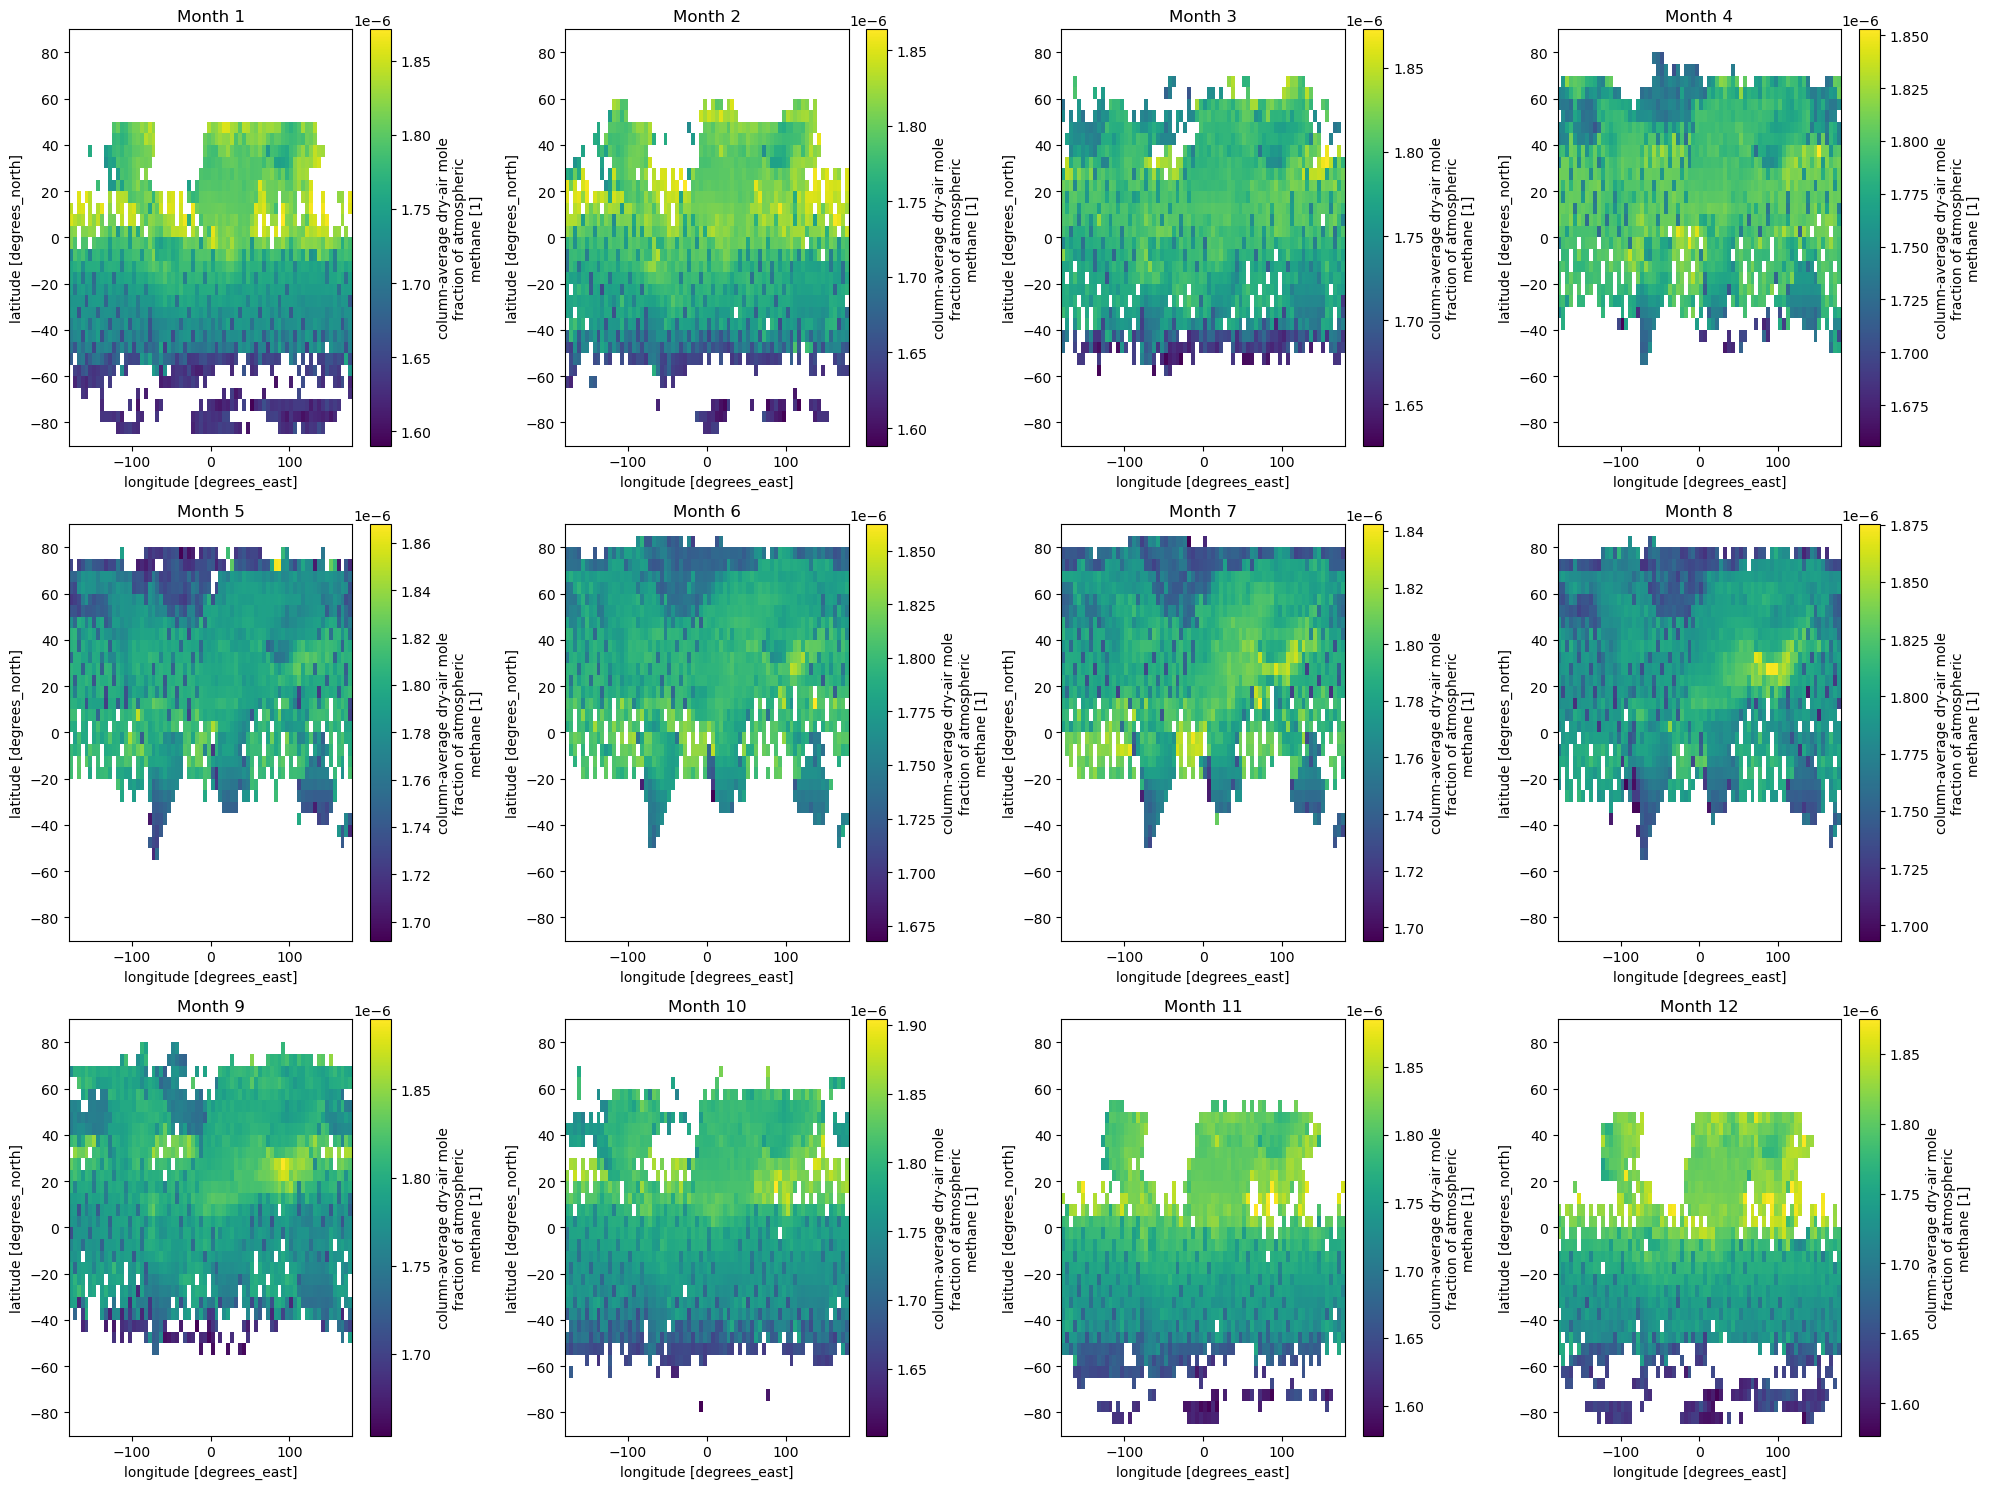

In [11]:
# 选择需要绘制的变量
CH4_var = CH4['xch4']
# 计算每个月的气候平均值
monthly_climatology = CH4_var.groupby('time.month').mean('time')
# 设置图表的布局
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

# 绘制每个月的数据
for month in range(1, 13):
    # 选择每个月的数据
    month_data = monthly_climatology.sel(month=month)
    # 获取对应的子图轴
    row = (month - 1) // 4
    col = (month - 1) % 4
    ax = axes[row, col]
    # 绘制
    month_data.plot(ax=ax)
    ax.set_title(f'Month {month}')

# 调整子图间距
plt.tight_layout()
plt.show()

In [12]:
#1.2 [5 points] Plot globally-averaged methane from 2003-01 to 2020-06 as a time series. Describe your results. Check your plot with this one.

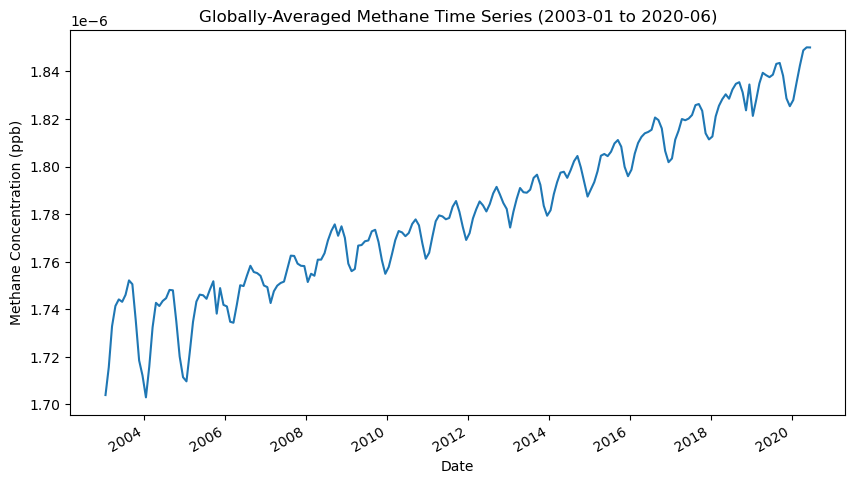

In [13]:
#图1
# 计算全球平均
global_CH4 = CH4_var.mean(['lat', 'lon'])
# 移除NaN值
global_CH4 = global_CH4.dropna(dim='time')

# 画图
plt.figure(figsize=(10, 5))
global_CH4.plot()
plt.title('Globally-Averaged Methane Time Series (2003-01 to 2020-06)')
plt.xlabel('Date')
plt.ylabel('Methane Concentration (ppb)')
plt.show()

#Describe your results.
#随着时间序列总体呈现波动上升

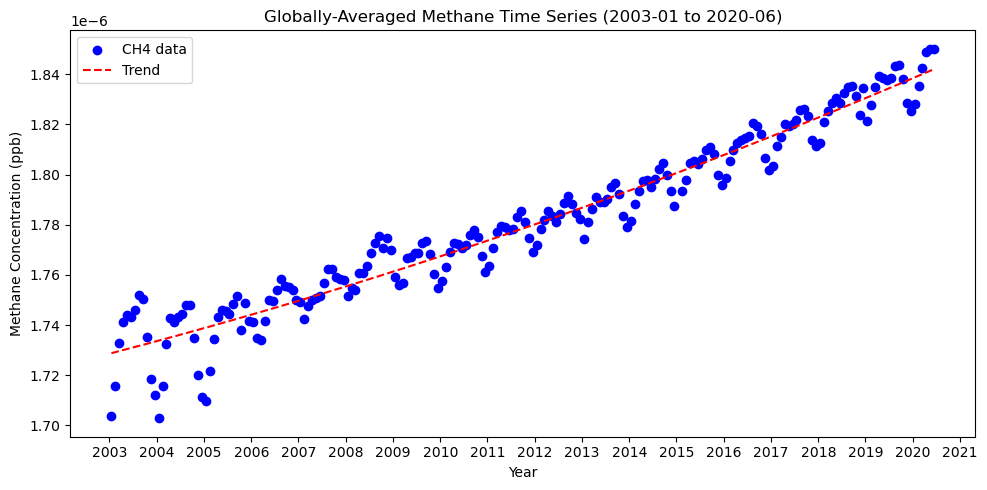

In [14]:
#图2

# 提取时间数据和甲烷浓度数据
times = global_CH4['time'].values
ch4_values = global_CH4.values

# 将时间转换为 matplotlib 可识别的格式
dates = mdates.date2num(np.array(times, dtype='datetime64[D]'))

# 绘制散点图
plt.figure(figsize=(10, 5))
plt.scatter(dates, ch4_values, label='CH4 data', color='blue')

# 使用 polyfit 拟合一个趋势线
z = np.polyfit(dates, ch4_values, 2)
p = np.poly1d(z)

# 生成趋势线的时间点
trend_dates = np.linspace(dates.min(), dates.max(), 300)
# 绘制趋势线
plt.plot(trend_dates, p(trend_dates), "r--", label='Trend')

# 格式化 x 轴日期显示为年份
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# 显示图例
plt.legend()
# 显示图表
plt.title('Globally-Averaged Methane Time Series (2003-01 to 2020-06)')
plt.xlabel('Year')
plt.ylabel('Methane Concentration (ppb)')
plt.tight_layout()
plt.show()
# 关闭.nc文件
CH4.close()

#Describe your results.
#随着时间序列总体呈现波动上升

In [19]:
#1.3 [5 points] Plot deseasonalized methane levels at point [15°S, 150°W] from 2003-01 to 2020-06 as a time series. Describe your results

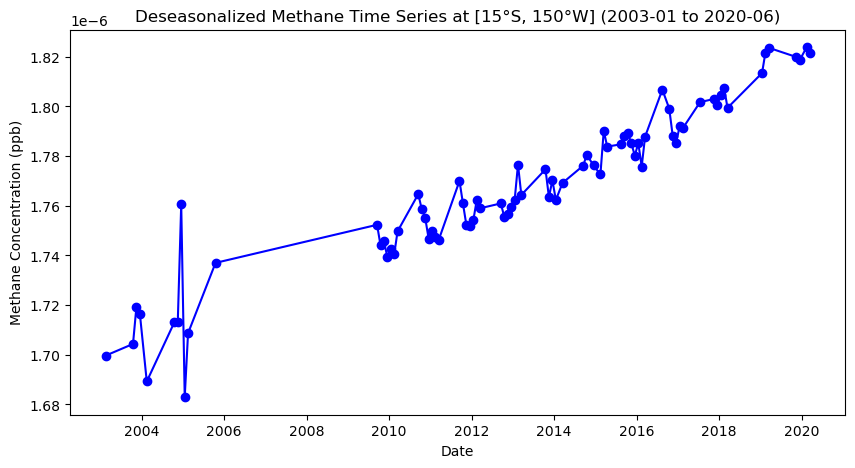

In [21]:
#图1
# levels at point [15°S, 150°W]
location_CH4 = CH4['xch4'].sel(lat=-15, lon=-150 , method='nearest')
# 移除NaN值
location_CH4 = location_CH4.dropna(dim='time')

plt.figure(figsize=(10, 5))
plt.plot(location_CH4['time'].values, location_CH4, 'bo-')

plt.title('Deseasonalized Methane Time Series at [15°S, 150°W] (2003-01 to 2020-06)')
plt.xlabel('Date')
plt.ylabel('Methane Concentration (ppb)')
plt.show()

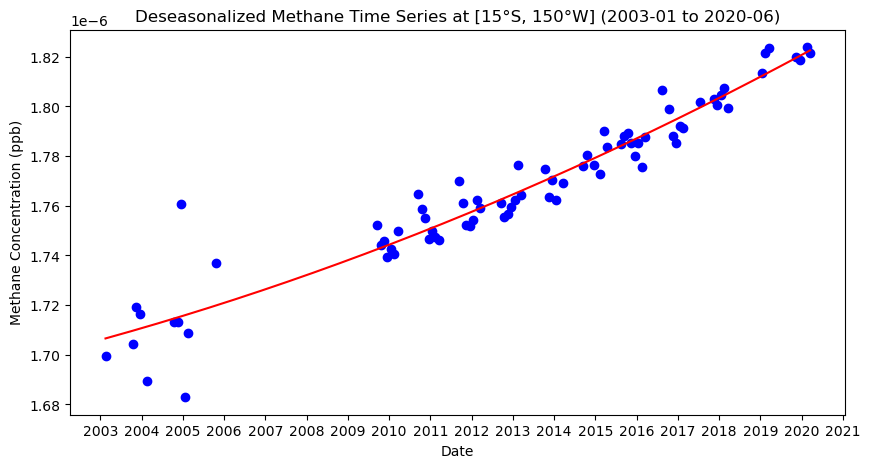

In [23]:
#图2
# 提取时间数据和甲烷浓度数据
times = location_CH4['time'].values
CH4_values_loc = location_CH4.values

# 将时间转换为 matplotlib 可识别的格式
dates = np.array([mdates.date2num(pd.to_datetime(t)) for t in times])

# 绘制散点图
plt.figure(figsize=(10, 5))
plt.scatter(dates, CH4_values_loc, label='CH4 data', color='blue')

# 使用 polyfit 拟合一个趋势线，这里使用二次多项式（阶数为2）
z = np.polyfit(dates, CH4_values_loc, 2)
p = np.poly1d(z)

# 生成趋势线的时间点
trend_dates = np.linspace(dates.min(), dates.max(), 300)
# 绘制趋势线
plt.plot(trend_dates, p(trend_dates), "r-", label='Trend line')

# 格式化 x 轴日期显示为年份
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title('Deseasonalized Methane Time Series at [15°S, 150°W] (2003-01 to 2020-06)')
plt.xlabel('Date')
plt.ylabel('Methane Concentration (ppb)')
plt.show()

# 关闭.nc文件
CH4.close()

#Describe your results.
#随着时间序列总体呈现波动上升

In [25]:
#2. Niño 3.4 index
#The Niño 3.4 anomalies may be thought of as representing the average equatorial sea surface temperatures (SSTs) across the Pacific from about the dateline to the South American coast (5N-5S, 170W-120W). 
#The Niño 3.4 index typically uses a 3-month running mean, and El Niño or La Niña events are defined when the Niño 3.4 SSTs exceed +/- 0.5°C for a period of 5 months or more. 
#Check Equatorial Pacific Sea Surface Temperatures for more about the Niño 3.4 index.

#In this problem set, you will use the sea surface temperature (SST) data from NOAA. Download the netCDF4 file (NOAA_NCDC_ERSST_v3b_SST.nc) here.


In [27]:
# Load the NetCDF file
sst_ds = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc")
sst_ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [29]:
#2.1 [10 points] Compute monthly climatology for SST from Niño 3.4 region, and subtract climatology from SST time series to obtain anomalies.

In [31]:
# 选择Niño 3.4区域的SST
lat_bounds = slice(-5, 5)  # 5°N to 5°S
lon_bounds = slice(190, 240)  # 170°W to 120°W 即(190E, 240E)

sst_nino34 = sst_ds.sst.sel(lat=lat_bounds, lon=lon_bounds)

# 计算尼诺 3.4 区域的面积加权平均海表温度(SST)
weights = np.cos(np.deg2rad(sst_nino34.lat))  
sst_nino34_weighted_mean = (sst_nino34 * weights).mean(dim=["lat", "lon"]) / weights.mean(dim="lat")

#通过按月份分组，然后计算每个月在所有年份的平均值
sst_climatology = sst_nino34_weighted_mean.groupby("time.month").mean("time")
#sst_climatology = sst_nino34.groupby("time.month").mean("time")

# 从原始数据中减去气候学，得到异常值
sst_anomalies = sst_nino34_weighted_mean.groupby("time.month") - sst_climatology

sst_climatology, sst_anomalies

(<xarray.DataArray (month: 12)>
 array([26.567791, 26.742277, 27.239607, 27.693747, 27.795218, 27.59776 ,
        27.198921, 26.824205, 26.737833, 26.717144, 26.693289, 26.613096],
       dtype=float32)
 Coordinates:
   * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12,
 <xarray.DataArray (time: 684)>
 array([-3.1966972e-01, -4.6856880e-01, -2.6817322e-01, -1.8702698e-01,
        -1.7763329e-01, -3.5774994e-01, -1.4202499e-01,  1.4617920e-02,
        -1.5233040e-01, -3.7995529e-01, -3.6094475e-01, -2.0870590e-01,
        -1.9146347e-01, -1.3425446e-01, -2.4034500e-01, -1.8515396e-01,
         5.1975250e-02,  2.3946571e-01, -7.0287704e-02, -4.1871262e-01,
        -7.7839279e-01, -7.9244804e-01, -4.9628067e-01, -4.1731834e-01,
        -4.4483185e-01, -4.5603943e-01, -4.3614388e-01, -4.6699524e-01,
        -5.6461143e-01, -4.2693138e-01, -2.7675629e-01, -3.1725311e-01,
        -6.7326164e-01, -6.6616821e-01, -8.1782341e-01, -8.6558533e-01,
        -7.0150185e-01, -3.5710335e-01,  6.9654

In [33]:
#1.2 [10 points] Visualize the computed Niño 3.4. Your plot should look similar to this one.

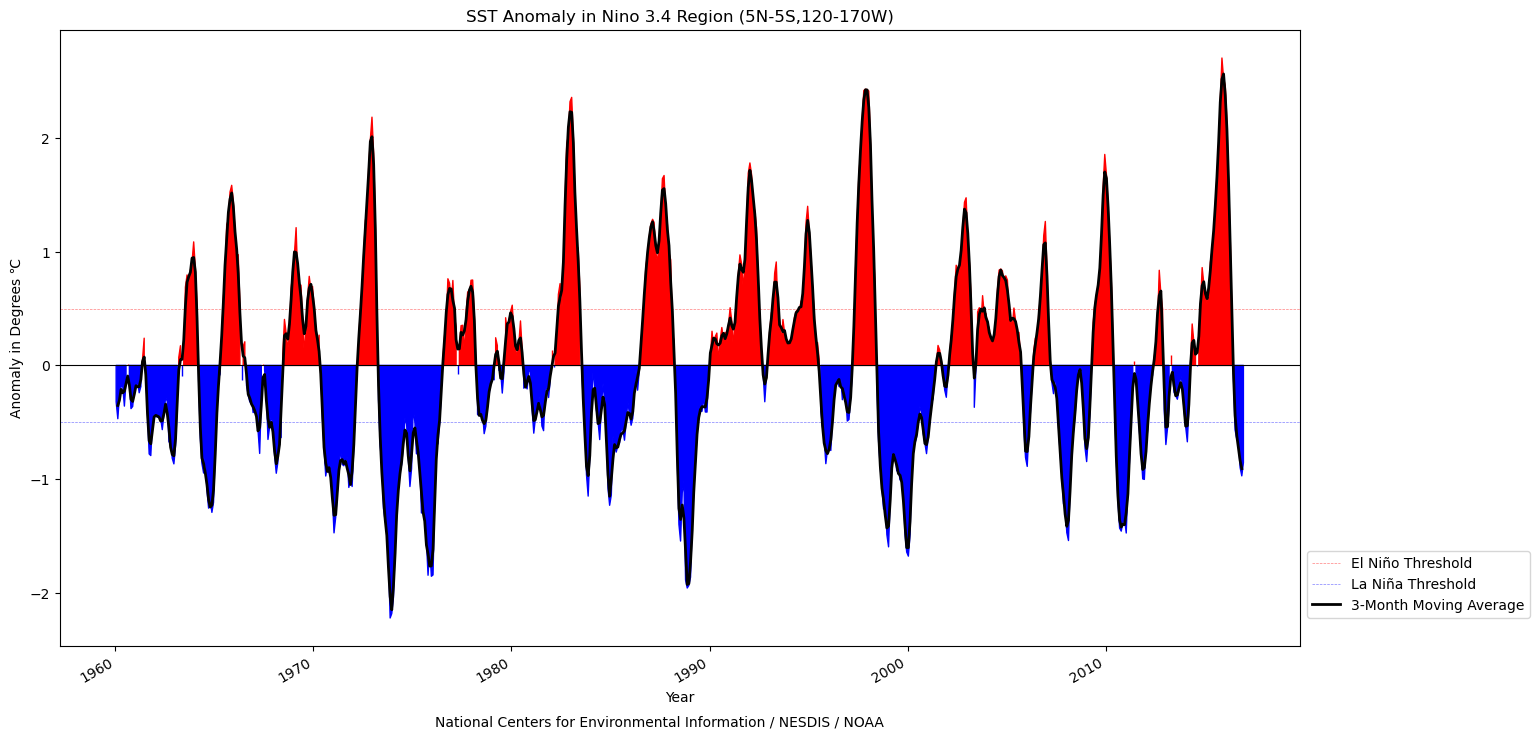

In [35]:
# 计算三个月滑动平均值
sst_anomalies_sma = sst_anomalies.rolling(time=3, center=True).mean()

# 创建图形
plt.figure(figsize=(16,8))

# 填充颜色（红色为正异常，蓝色为负异常）
plt.fill_between(sst_anomalies.time, sst_anomalies, 0, where=sst_anomalies > 0, color="red" )
plt.fill_between(sst_anomalies.time, sst_anomalies, 0, where=sst_anomalies < 0, color="blue")

# 添加 El Niño 和 La Niña 阈值线
plt.axhline(0.5, color='red', linestyle='--', linewidth=0.5, alpha=0.5, label="El Niño Threshold")
plt.axhline(-0.5, color='blue', linestyle='--', linewidth=0.5, alpha=0.5, label="La Niña Threshold")

# 绘制三个月滑动平均值曲线
sst_anomalies_sma.plot(color='black', linewidth=2, label="3-Month Moving Average")


# 添加图例和标签
plt.axhline(0, color='black', linewidth=0.8)
plt.title("SST Anomaly in Nino 3.4 Region (5N-5S,120-170W)")
plt.ylabel("Anomaly in Degrees ℃")
plt.xlabel("Year")
plt.figtext(0.5, 0.01, 'National Centers for Environmental Information / NESDIS / NOAA', ha='center', fontsize=10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.1))
plt.show()


In [37]:
#3. Explore a netCDF dataset
# Browse the NASA’s Goddard Earth Sciences Data and Information Services Center (GES DISC) website. 
# Search and download a dataset you are interested in. You are also welcome to use data from your group in this problem set. 
# But the dataset should be in netCDF format, and have temporal information.

In [39]:
#3.1 [5 points] Plot a time series of a certain variable with monthly seasonal cycle removed.

In [282]:
#wget --load-cookies C:\.urs_cookies --save-cookies C:\.urs_cookies --keep-session-cookies --user=yonker12431313 --ask-password -i E:\course\ESE_COURSE\PS3\subset_MERRA2_CNN_HAQAST_PM25_1_20241113_064507_.txt

In [80]:
import os
import re
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [53]:
#先打开一个打开 netCDF 文件看一下有哪些变量
with nc.Dataset('E:/course/ESE_COURSE/PS3/output_file/oco2_GEOS_L3CO2_month_201501_B10206Ar.nc4' ) as dataset:
    # 打印所有变量名称
    print("Variables in the file:")
    for var in dataset.variables:
        print(var)

Variables in the file:
XCO2
XCO2PREC
lat
lon
time


In [72]:
# 设置数据目录
data_dir = 'E:/course/ESE_COURSE/PS3/output_file'

# 获取所有 netCDF 文件
nc_files = [f for f in os.listdir(data_dir) if f.endswith('.nc4')]

In [82]:
# 先创建一个空字典，用于存储时间和对应的 XCO2 平均值，以便后续数据处理
xco2_dict = {}

# 遍历所有文件
for file in nc_files:
    file_path = os.path.join(data_dir, file)
    
    # 打开 netCDF 文件
    with nc.Dataset(file_path) as dataset:
        # 读取变量数据
        xco2 = dataset.variables['XCO2'][:]  
        time_var = dataset.variables['time'][:]  # 获取时间数据
        
        # 将时间转换为 datetime 对象
        time_units = dataset.variables['time'].units
        try:
            time_calendar = dataset.variables['time'].calendar
        except AttributeError:
            time_calendar = 'standard'  # 如果没有 calendar 属性，使用标准公历
        times = nc.num2date(time_var, units=time_units, calendar=time_calendar)
        
        # 计算 XCO2 数据的平均值（按时间维度求平均）
        time_avg_xco2 = np.mean(xco2, axis=0)  # 按时间维度（axis=0）求平均
        
        # 再对空间维度进行求平均，得到一个单一的 XCO2 平均值
        avg_xco2 = np.mean(time_avg_xco2)  # 在 lat 和 lon 维度上再求平均
        
        # 使用正则表达式从文件名中提取年月
        match = re.search(r'(\d{4})(\d{2})', file)  
        if match:
            year_month = f"{match.group(1)}-{match.group(2)}"  # 格式化为 'YYYY-MM'
        else:
            year_month = 'Unknown'  # 如果提取失败，使用 'Unknown'
        
        # 将年月和对应的平均 XCO2 存入字典
        xco2_dict[year_month] = avg_xco2
xco2_dict

{'2015-01': 0.00039796826485955183,
 '2015-02': 0.00039845149601055904,
 '2015-03': 0.0003988250209472504,
 '2015-04': 0.00039917714090489633,
 '2015-05': 0.0003992907825065787,
 '2015-06': 0.000398648994236562,
 '2015-07': 0.00039744816917165466,
 '2015-08': 0.0003968212589242938,
 '2015-09': 0.00039716908870620043,
 '2015-10': 0.00039818414635090106,
 '2015-11': 0.00039935116385761334,
 '2015-12': 0.0004002732622317736,
 '2016-01': 0.0004009385726106052,
 '2016-02': 0.0004014733677147184,
 '2016-03': 0.0004019537435347103,
 '2016-04': 0.00040249511087986616,
 '2016-05': 0.00040260669669729845,
 '2016-06': 0.000401896852989735,
 '2016-07': 0.0004006384790831488,
 '2016-08': 0.00039998300171913283,
 '2016-09': 0.0004004655540181946,
 '2016-10': 0.00040140277463867485,
 '2016-11': 0.00040234865988523144,
 '2016-12': 0.0004031980402131462,
 '2017-01': 0.0004037565372764677,
 '2017-02': 0.0004041298061249722,
 '2017-03': 0.00040450766158228583,
 '2017-04': 0.00040483780009608266,
 '2017-0

In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose
# 提取时间和 XCO2数据
time_series = list(xco2_dict.keys())  # 获取年月
xco2_values = list(xco2_dict.values())  # 获取对应的 XCO2 平均值

# 转换时间格式为 pandas 日期
dates = pd.to_datetime(time_series, format='%Y-%m')  # 将年月字符串转换为日期格式

# 创建一个 pandas DataFrame 来存储时间序列数据
df_XCO2 = pd.DataFrame({'Date': dates, 'XCO2': xco2_values})

# 设置 Date 为索引
df_XCO2.set_index('Date', inplace=True)

# 使用季节性分解去除月度季节性
decomposition_XCO2 = seasonal_decompose(df_XCO2['XCO2'], model='additive', period=12)  # period=12 表示一年有12个月

# 获取去除季节性后的数据
detrended_XCO2 = df_XCO2['XCO2'] - decomposition_XCO2.seasonal


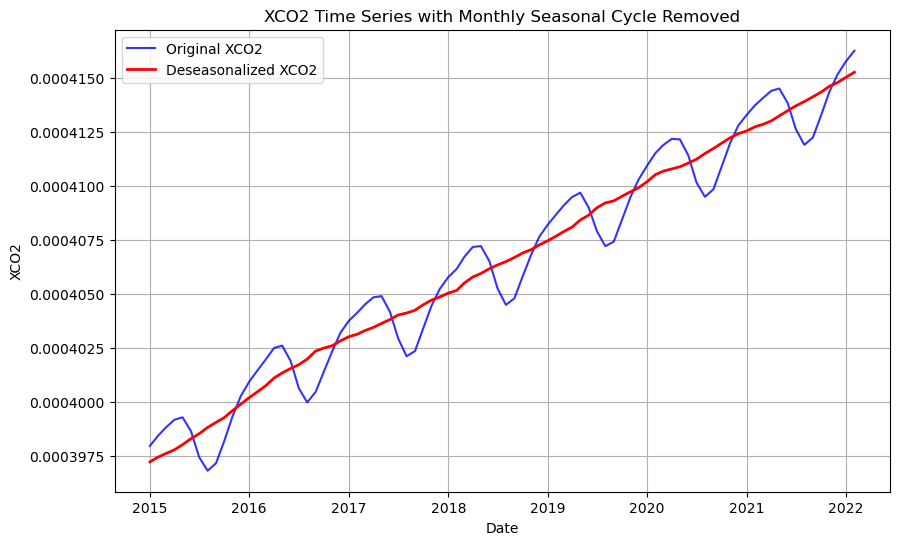

In [92]:
# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(df_XCO2.index, df_XCO2['XCO2'], label='Original XCO2', color='blue', alpha=0.8)
plt.plot(detrended_XCO2.index, detrended_XCO2, label='Deseasonalized XCO2', color='red', linewidth=2)
plt.title('XCO2 Time Series with Monthly Seasonal Cycle Removed')
plt.xlabel('Date')
plt.ylabel('XCO2')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
#3.2 [10 points] Make at least 5 different plots using the dataset.

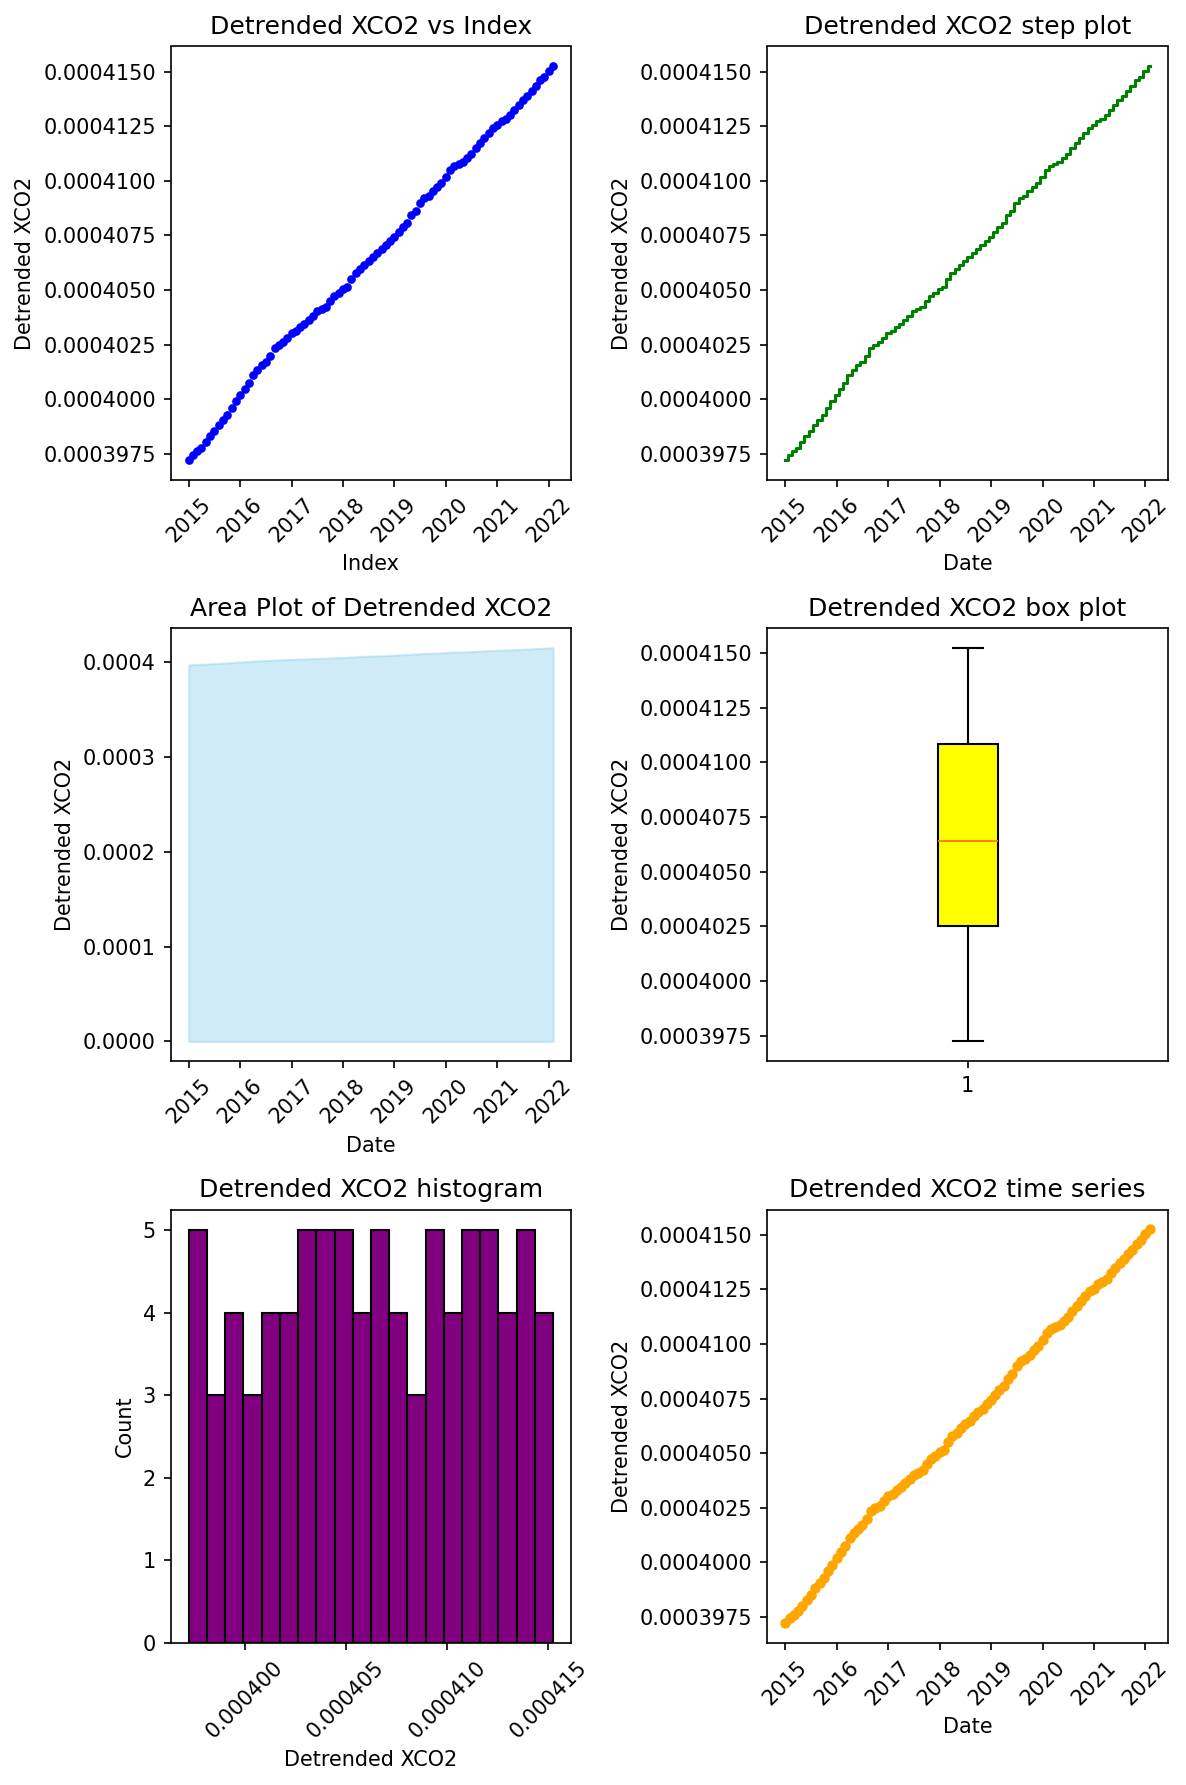

In [88]:
#参考Section_08.ipynb Exercise #1
# Create Figure and Subplots
plt.figure(figsize=(8,12), dpi=150) 

x=detrended_XCO2.index
y=detrended_XCO2# , label='Deseasonalized XCO2'

# scatter plot between detrended_XCO2 and detrended_XCO2
plt.subplot(3,2,1)  
plt.scatter(x, y, s=10, color='blue')  
plt.title('Detrended XCO2 vs Index')  
plt.xlabel('Index'); plt.ylabel('Detrended XCO2')
plt.xticks(rotation=45)

# step chart of detrended_XCO2 (try plt.step())
plt.subplot(3,2,2) 
plt.step(x, y, where='mid', color='green')  
plt.title('Detrended XCO2 step plot')  
plt.xlabel('Date'); plt.ylabel('Detrended XCO2')
plt.xticks(rotation=45)

# 绘制面积图
plt.subplot(3,2,3) 
plt.fill_between(x, y, color='skyblue', alpha=0.4)
plt.title('Area Plot of Detrended XCO2')
plt.xlabel('Date'); plt.ylabel('Detrended XCO2')
plt.xticks(rotation=45)

# box plot of detrended_XCO2 (try plt.boxplot())
plt.subplot(3,2,4) 
plt.boxplot(y, patch_artist=True, boxprops=dict(facecolor='yellow'))  
plt.title('Detrended XCO2 box plot')  
plt.ylabel('Detrended XCO2')

# histogram of detrended_XCO2 (try plt.hist())
plt.subplot(3,2,5) 
plt.hist(y, bins=20, color='purple', edgecolor='black')  
plt.title('Detrended XCO2 histogram')  
plt.xlabel('Detrended XCO2'); plt.ylabel('Count')
plt.xticks(rotation=45)

# time series of detrended_XCO2
plt.subplot(3,2,6) 
plt.plot(x, y, 'o--', markersize=4, color='orange')  
plt.title('Detrended XCO2 time series')  
plt.xlabel('Date'); plt.ylabel('Detrended XCO2')
plt.xticks(rotation=45)


# Show plot
plt.tight_layout()
plt.show()